In [41]:
# Analyse statistique du S&P500 sur 30 ans
# Importation des bibliothèques nécessaires
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mtick
import warnings
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

ModuleNotFoundError: No module named 'investpy'

In [15]:
# Configuration des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12
warnings.filterwarnings('ignore')

In [87]:
# Download S&P 500 data
start_date = '1994-01-01'
end_date = datetime.today().year
sp500_data = pdr.get_data_stooq('^SPX', start=start_date, end=end_date)

In [67]:
# Vérification des colonnes disponibles
print("\nColonnes disponibles:", sp500_data.columns.tolist())

# Identification de la colonne de prix à utiliser
if 'Adj Close' in sp500_data.columns:
    price_column = 'Adj Close'
elif 'Close' in sp500_data.columns:
    price_column = 'Close'
elif 'SP500' in sp500_data.columns:
    price_column = 'SP500'
elif '^SPX' in sp500_data.columns:
    price_column = '^SPX'
else:
    # Utiliser la première colonne si aucune des colonnes attendues n'est trouvée
    price_column = sp500_data.columns[0]

print(f"Colonne de prix utilisée: '{price_column}'")


Colonnes disponibles: ['Open', 'High', 'Low', 'Close', 'Volume']
Colonne de prix utilisée: 'Close'


In [68]:
# Affichage des premières lignes
print("\nAperçu des données téléchargées:")
print(sp500_data.head())


Aperçu des données téléchargées:
               Open     High      Low    Close        Volume
Date                                                        
2024-12-31  5919.74  5929.74  5868.86  5881.63  1.796607e+09
2024-12-30  5920.67  5940.79  5869.16  5906.94  1.943393e+09
2024-12-27  6006.17  6006.17  5932.95  5970.84  1.817798e+09
2024-12-26  6024.97  6049.75  6007.37  6037.59  1.506251e+09
2024-12-24  5984.63  6040.10  5981.44  6040.04  1.133217e+09


In [69]:
# Informations sur les données
print(f"\nPériode couverte: du {sp500_data.index.min().strftime('%d-%m-%Y')} au {sp500_data.index.max().strftime('%d-%m-%Y')}")
print(f"Nombre total de jours de trading: {len(sp500_data)}")



Période couverte: du 02-01-1964 au 31-12-2024
Nombre total de jours de trading: 15355


In [70]:
# Vérification des valeurs manquantes
missing_values = sp500_data.isna().sum()
print("\nValeurs manquantes par colonne:")
print(missing_values)


Valeurs manquantes par colonne:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [71]:
# Si nécessaire, suppression des lignes avec des valeurs manquantes
if sp500_data[price_column].isna().sum() > 0:
    print(f"Suppression des {sp500_data[price_column].isna().sum()} lignes avec des valeurs manquantes...")
    sp500_data = sp500_data.dropna(subset=[price_column])

In [72]:
# 2. Calcul des rendements mensuels
monthly_prices = sp500_data[price_column].resample('M').last()

# Calcul des rendements mensuels en pourcentage
monthly_returns = monthly_prices.pct_change() * 100
monthly_returns = monthly_returns.dropna()

# Création d'un DataFrame avec des colonnes supplémentaires
monthly_df = pd.DataFrame(monthly_returns)
monthly_df.columns = ['Monthly_Return_%']
monthly_df['Year'] = monthly_df.index.year
monthly_df['Month'] = monthly_df.index.month
monthly_df['Month_Name'] = monthly_df.index.strftime('%B')  # Nom du mois

# Aperçu des rendements mensuels
print("\nAperçu des rendements mensuels:")
print(monthly_df.head())

# Statistiques des rendements mensuels
print("\nStatistiques des rendements mensuels:")
print(monthly_df['Monthly_Return_%'].describe())


Aperçu des rendements mensuels:
            Monthly_Return_%  Year  Month Month_Name
Date                                                
1964-02-29          0.986501  1964      2   February
1964-03-31          1.516710  1964      3      March
1964-04-30          0.607749  1964      4      April
1964-05-31          1.145230  1964      5        May
1964-06-30          1.642404  1964      6       June

Statistiques des rendements mensuels:
count    731.000000
mean       0.688844
std        4.319267
min      -21.763043
25%       -1.777853
50%        0.958951
75%        3.500523
max       16.304690
Name: Monthly_Return_%, dtype: float64


In [73]:
# 3. Calcul des rendements annuels
# Resample pour obtenir le dernier prix ajusté de chaque année
annual_prices = sp500_data[price_column].resample('Y').last()

# Calcul des rendements annuels en pourcentage
annual_returns = annual_prices.pct_change() * 100
annual_returns = annual_returns.dropna()

# Création d'un DataFrame avec l'année
annual_df = pd.DataFrame(annual_returns)
annual_df.columns = ['Annual_Return_%']
annual_df['Year'] = annual_df.index.year

# Aperçu des rendements annuels
print("\nRendements annuels du S&P500 sur 30 ans:")
print(annual_df)

# Statistiques des rendements annuels
print("\nStatistiques des rendements annuels:")
print(annual_df['Annual_Return_%'].describe())


Rendements annuels du S&P500 sur 30 ans:
            Annual_Return_%  Year
Date                             
1965-12-31         9.061947  1965
1966-12-31       -13.090988  1966
1967-12-31        20.092120  1967
1968-12-31         7.660413  1968
1969-12-31       -11.361448  1969
1970-12-31         0.097762  1970
1971-12-31        10.786761  1971
1972-12-31        15.633265  1972
1973-12-31       -17.365523  1973
1974-12-31       -29.718093  1974
1975-12-31        31.549008  1975
1976-12-31        19.148464  1976
1977-12-31       -11.501954  1977
1978-12-31         1.062040  1978
1979-12-31        12.308813  1979
1980-12-31        25.773578  1980
1981-12-31        -9.730407  1981
1982-12-31        14.761322  1982
1983-12-31        17.271047  1983
1984-12-31         1.400594  1984
1985-12-31        26.333413  1985
1986-12-31        14.620409  1986
1987-12-31         2.027501  1987
1988-12-31        12.400842  1988
1989-12-31        27.250468  1989
1990-12-31        -6.559140  1990
1991-1

In [74]:
# 4. Tri des rendements mensuels et annuels
# Tri des rendements mensuels du plus élevé au plus bas
sorted_monthly_returns = monthly_df.sort_values(by='Monthly_Return_%', ascending=False)

# Tri des rendements annuels du plus élevé au plus bas
sorted_annual_returns = annual_df.sort_values(by='Annual_Return_%', ascending=False)

# Affichage des 10 meilleurs et 10 pires rendements mensuels
print("\nTop 10 des meilleurs rendements mensuels:")
print(sorted_monthly_returns.head(10))

print("\nTop 10 des pires rendements mensuels:")
print(sorted_monthly_returns.tail(10))

# Affichage des meilleurs et pires rendements annuels
print("\nTop 10 des meilleurs rendements annuels:")
print(sorted_annual_returns.head(10))

print("\nTop 10 des pires rendements annuels:")
print(sorted_annual_returns.tail(10))


Top 10 des meilleurs rendements mensuels:
            Monthly_Return_%  Year  Month Month_Name
Date                                                
1974-10-31         16.304690  1974     10    October
1987-01-31         13.176694  1987      1    January
2020-04-30         12.684410  2020      4      April
1975-01-31         12.281214  1975      1    January
1976-01-31         11.830580  1976      1    January
1982-08-31         11.597722  1982      8     August
1991-12-31         11.158787  1991     12   December
1982-10-31         11.044677  1982     10    October
2011-10-31         10.772304  2011     10    October
2020-11-30         10.754566  2020     11   November

Top 10 des pires rendements mensuels:
            Monthly_Return_%  Year  Month Month_Name
Date                                                
1990-08-31         -9.431419  1990      8     August
1980-03-31        -10.179483  1980      3      March
2009-02-28        -10.993122  2009      2   February
2002-09-30       

In [75]:
# 5. Analyse des années positives vs négatives
# Identification des années positives et négatives
positive_years = annual_df[annual_df['Annual_Return_%'] > 0]
negative_years = annual_df[annual_df['Annual_Return_%'] <= 0]

# Calcul des statistiques
total_years = len(annual_df)
num_positive_years = len(positive_years)
num_negative_years = len(negative_years)
pct_positive_years = (num_positive_years / total_years) * 100
pct_negative_years = (num_negative_years / total_years) * 100

# Création d'un DataFrame pour les statistiques
summary_stats = pd.DataFrame({
    'Metric': ['Total Years Analyzed', 'Positive Years', 'Negative Years',
              'Percentage of Positive Years', 'Percentage of Negative Years'],
    'Value': [total_years, num_positive_years, num_negative_years,
             f"{pct_positive_years:.2f}%", f"{pct_negative_years:.2f}%"]
})

# Affichage des statistiques
print("\nAnalyse des années positives vs négatives:")
print(summary_stats)


Analyse des années positives vs négatives:
                         Metric   Value
0          Total Years Analyzed      60
1                Positive Years      44
2                Negative Years      16
3  Percentage of Positive Years  73.33%
4  Percentage of Negative Years  26.67%


In [76]:
# 6. Analyse des mois négatifs dans les années positives
# Initialisation d'une liste pour stocker les résultats
positive_years_analysis = []

# Analyse pour chaque année positive
for year in positive_years['Year']:
    # Filtrage des rendements mensuels pour cette année
    year_months = monthly_df[monthly_df['Year'] == year]

    # Vérification qu'il y a des données pour cette année
    if len(year_months) > 0:
        # Comptage des mois négatifs
        negative_months = year_months[year_months['Monthly_Return_%'] < 0]
        num_negative_months = len(negative_months)

        # Recherche du pire rendement mensuel
        worst_monthly_return = year_months['Monthly_Return_%'].min()
        worst_month_idx = year_months['Monthly_Return_%'].idxmin()
        worst_month_name = year_months.loc[worst_month_idx, 'Month_Name']

        # Récupération du rendement annuel
        annual_return = positive_years.loc[positive_years['Year'] == year, 'Annual_Return_%'].values[0]

        # Ajout aux résultats
        positive_years_analysis.append({
            'Year': year,
            'Annual_Return_%': annual_return,
            'Number_of_Negative_Months': num_negative_months,
            'Worst_Monthly_Return_%': worst_monthly_return,
            'Worst_Month': worst_month_name
        })

# Création d'un DataFrame à partir des résultats
positive_years_with_negative_months = pd.DataFrame(positive_years_analysis)

# Vérification que le DataFrame n'est pas vide
if not positive_years_with_negative_months.empty:
    # Tri par rendement annuel (du plus élevé au plus bas)
    positive_years_with_negative_months = positive_years_with_negative_months.sort_values(
        by='Annual_Return_%', ascending=False)

    # Calcul des moyennes
    avg_negative_months = positive_years_with_negative_months['Number_of_Negative_Months'].mean()
    avg_worst_return = positive_years_with_negative_months['Worst_Monthly_Return_%'].mean()

    # Affichage des résultats
    print("\nAnalyse des mois négatifs dans les années positives:")
    print(positive_years_with_negative_months)

    print(f"\nEn moyenne, une année positive comporte {avg_negative_months:.1f} mois négatifs")
    print(f"Le pire rendement mensuel moyen dans une année positive est de {avg_worst_return:.2f}%")
else:
    print("\nAucune année positive avec des données mensuelles complètes n'a été trouvée.")



Analyse des mois négatifs dans les années positives:
    Year  Annual_Return_%  Number_of_Negative_Months  Worst_Monthly_Return_%  \
22  1995        34.110654                          2               -0.497938   
6   1975        31.549008                          4               -6.765417   
24  1997        31.008181                          3               -5.746560   
35  2013        29.601245                          2               -3.129801   
39  2019        28.878074                          2               -6.577773   
18  1989        27.250468                          4               -2.894410   
41  2021        26.892736                          3               -4.756914   
25  1998        26.668590                          3              -14.579671   
27  2003        26.380396                          3               -2.741470   
14  1985        26.333413                          5               -3.472406   
19  1991        26.306705                          3              

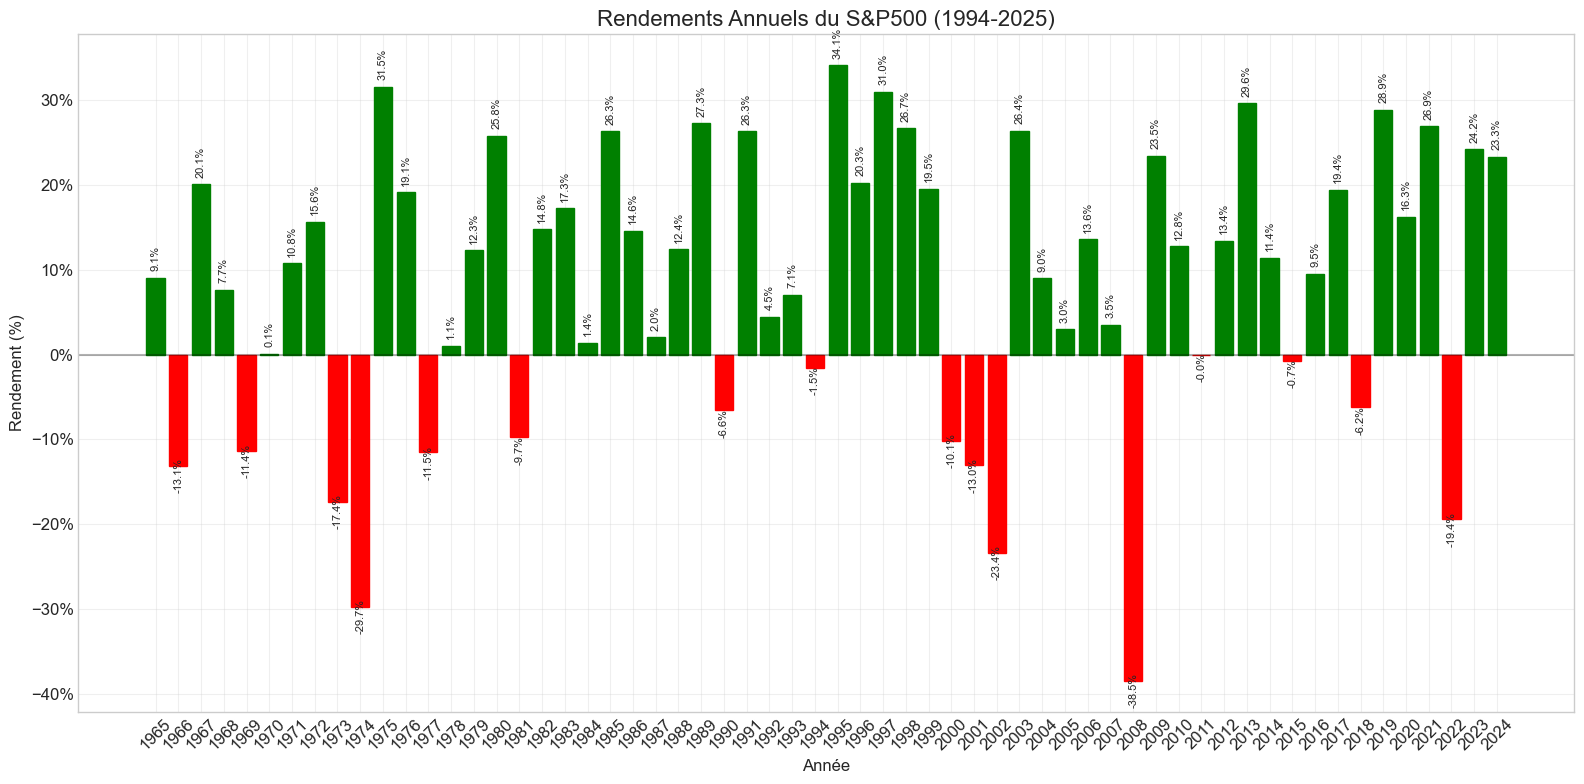

In [86]:
# 7. Visualisation des rendements annuels
plt.figure(figsize=(16, 8))

# Création des barres pour les rendements annuels
bars = plt.bar(annual_df['Year'], annual_df['Annual_Return_%'])

# Coloration des barres (vert pour positif, rouge pour négatif)
for i, bar in enumerate(bars):
    if annual_df['Annual_Return_%'].iloc[i] > 0:
        bar.set_color('green')
    else:
        bar.set_color('red')

# Ajout d'une ligne horizontale à 0%
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Ajout des labels et du titre
plt.title(f'Rendements Annuels du S&P500 (1994-{datetime.today().year})', fontsize=16)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Rendement (%)', fontsize=12)
plt.grid(True, alpha=0.3)

# Ajustement des ticks sur l'axe x
plt.xticks(annual_df['Year'], rotation=45)

# Formatage de l'axe y en pourcentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

# Ajout des valeurs au-dessus des barres
for i, v in enumerate(annual_df['Annual_Return_%']):
    plt.text(annual_df['Year'].iloc[i], v + (1 if v >= 0 else -3), f"{v:.1f}%",
             ha='center', fontsize=8, rotation=90)

plt.tight_layout()
plt.savefig('SP500_Annual_Returns.png', dpi=300, bbox_inches='tight')
plt.show()


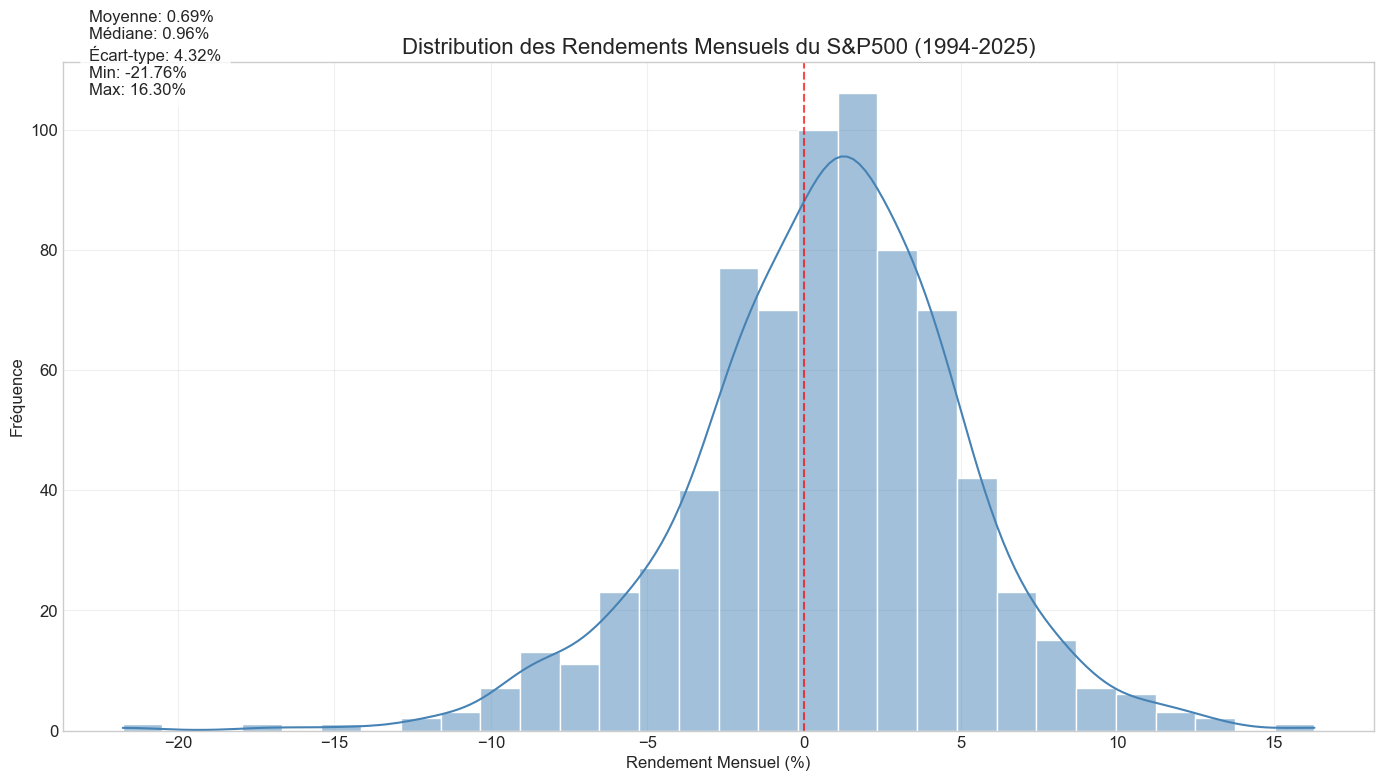

In [85]:
# 8. Distribution des rendements mensuels
plt.figure(figsize=(14, 8))

# Création de l'histogramme avec courbe KDE
sns.histplot(monthly_df['Monthly_Return_%'], kde=True, bins=30, color='steelblue')

# Ajout d'une ligne verticale à 0%
plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)

# Ajout des labels et du titre
plt.title(f'Distribution des Rendements Mensuels du S&P500 (1994-{datetime.today().year})', fontsize=16)
plt.xlabel('Rendement Mensuel (%)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.grid(True, alpha=0.3)

# Calcul et ajout des statistiques
mean_return = monthly_df['Monthly_Return_%'].mean()
median_return = monthly_df['Monthly_Return_%'].median()
std_dev = monthly_df['Monthly_Return_%'].std()
min_return = monthly_df['Monthly_Return_%'].min()
max_return = monthly_df['Monthly_Return_%'].max()

stats_text = f"Moyenne: {mean_return:.2f}%\nMédiane: {median_return:.2f}%\n" \
             f"Écart-type: {std_dev:.2f}%\nMin: {min_return:.2f}%\nMax: {max_return:.2f}%"

plt.annotate(stats_text, xy=(0.02, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))

plt.tight_layout()
plt.savefig('SP500_Monthly_Returns_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

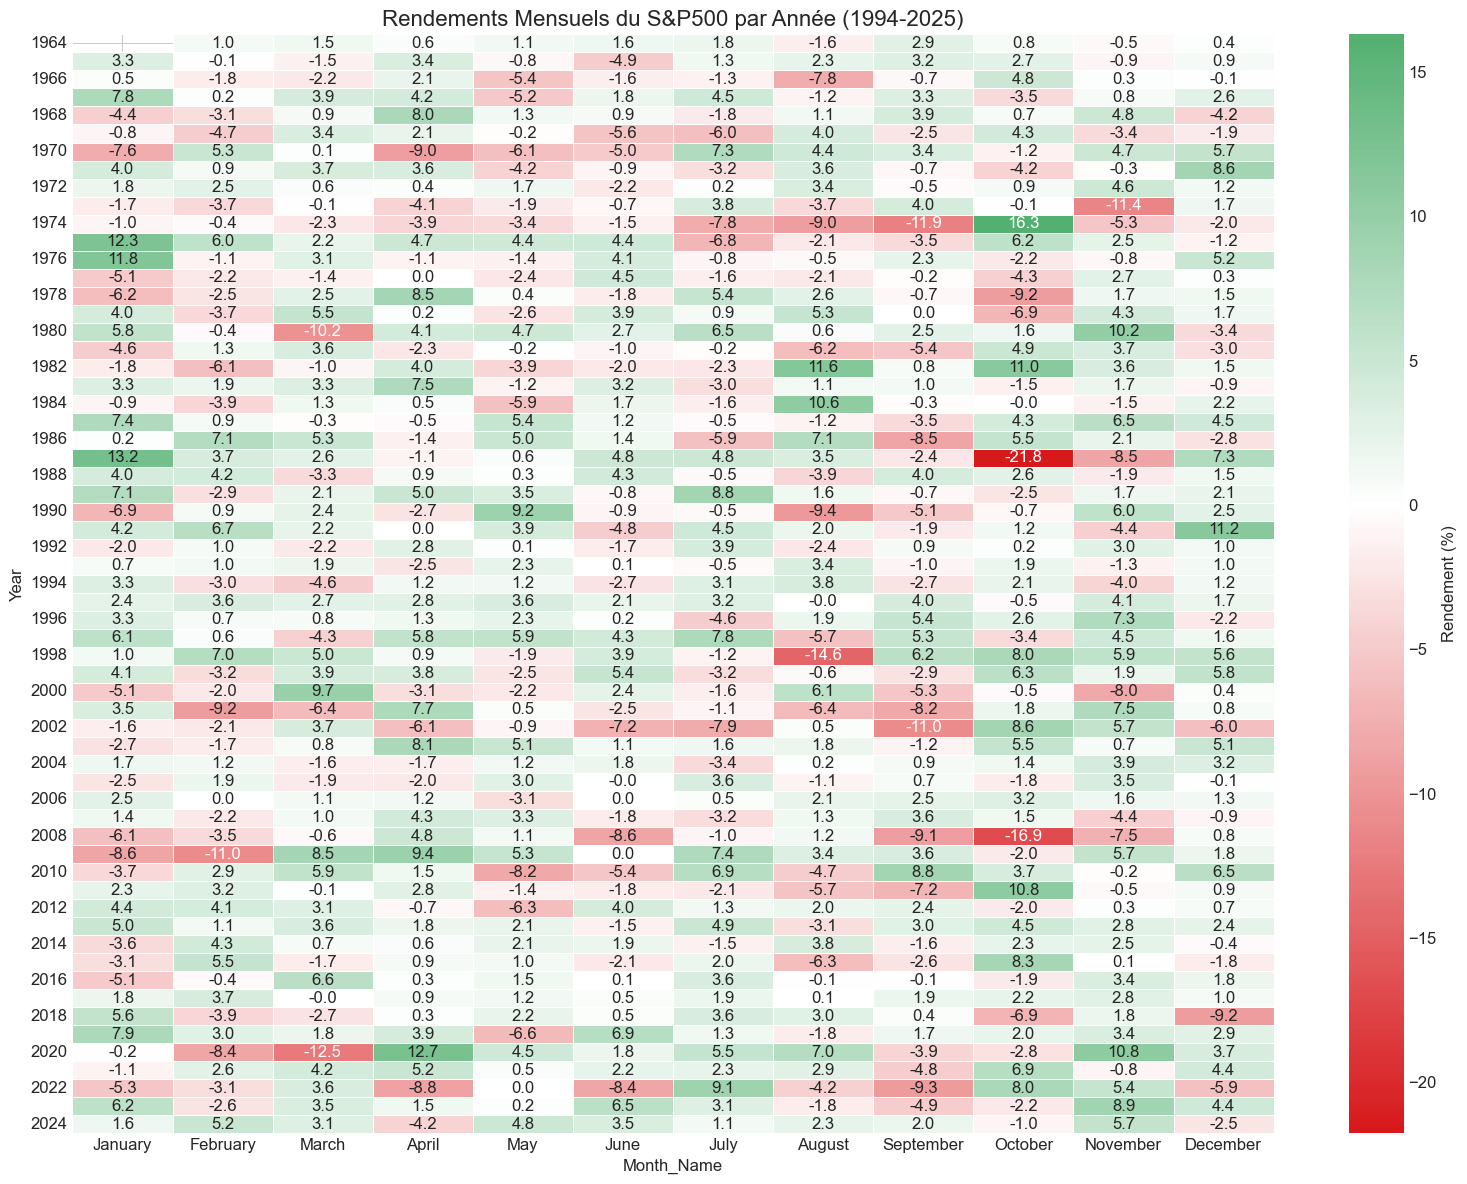

In [84]:
# 9. Création d'une heatmap des rendements mensuels par année
# Création d'un tableau croisé dynamique des rendements mensuels par année
try:
    monthly_pivot = monthly_df.pivot_table(
        index='Year',
        columns='Month_Name',
        values='Monthly_Return_%',
        aggfunc='sum'
    )

    # Réorganisation des colonnes dans l'ordre des mois (si possible)
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']

    # Vérification des noms de mois dans les colonnes
    available_months = set(monthly_pivot.columns)
    ordered_months = [m for m in month_order if m in available_months]

    # Si nous avons des mois à ordonner, réorganisons le pivot
    if ordered_months:
        monthly_pivot = monthly_pivot[ordered_months]

    # Création de la heatmap
    plt.figure(figsize=(16, 12))

    # Utilisation d'une palette de couleurs personnalisée
    cmap = LinearSegmentedColormap.from_list('RdYlGn', ['#d7191c', '#ffffff', '#1a9641'], N=256)

    # Création de la heatmap
    sns.heatmap(monthly_pivot, annot=True, cmap=cmap, center=0, fmt='.1f',
               linewidths=0.5, cbar_kws={'label': 'Rendement (%)'})

    # Ajout du titre
    plt.title(f'Rendements Mensuels du S&P500 par Année (1994-{datetime.today().year})', fontsize=16)

    plt.tight_layout()
    plt.savefig('SP500_Monthly_Returns_Heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
except Exception as e:
    print(f"Erreur lors de la création de la heatmap: {e}")
    print("Vérifiez que vous avez suffisamment de données mensuelles pour chaque année.")


Statistiques de performance par mois (1994-2024):
            mean  median    min    max   std
Month_Name                                  
January     1.07    1.50  -8.57  13.18  4.95
February    0.04    0.59 -10.99   7.15  3.89
March       1.06    1.52 -12.51   9.67  3.84
April       1.50    1.15  -9.05  12.68  4.13
May         0.31    0.55  -8.20   9.20  3.60
June        0.21    0.23  -8.60   6.89  3.49
July        0.86    0.87  -7.90   9.11  4.06
August      0.07    0.58 -14.58  11.60  4.71
September  -0.65   -0.25 -11.93   8.76  4.40
October     0.98    1.40 -21.76  16.30  5.96
November    1.63    2.15 -11.39  10.75  4.44
December    1.21    1.23  -9.18  11.16  3.50

Mois avec le meilleur rendement moyen: November (1.63%)
Mois avec le pire rendement moyen: September (-0.65%)


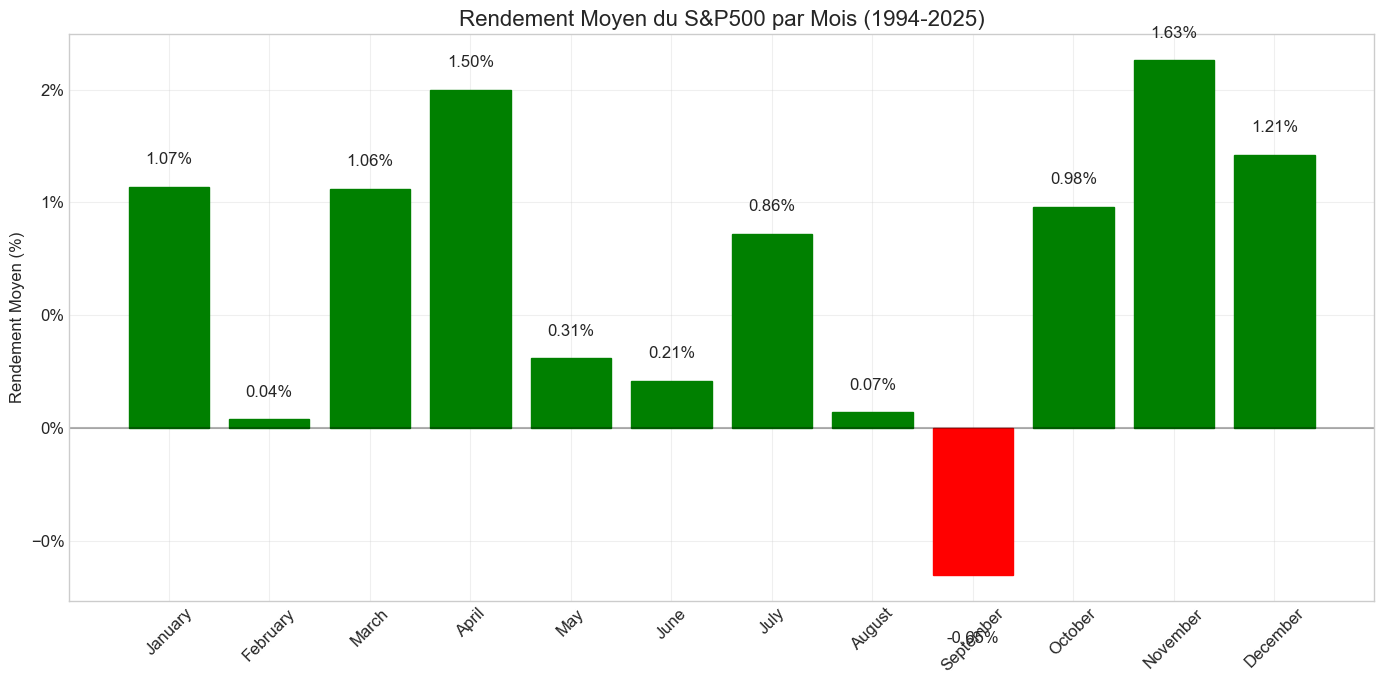

In [83]:
# 10. Analyse des meilleurs et pires mois
try:
    # Regroupement par mois et calcul des statistiques
    # Gérer les cas où Month_Name pourrait contenir des valeurs numériques
    if monthly_df['Month_Name'].dtype == 'object' or monthly_df['Month_Name'].dtype.name.startswith('str'):
        monthly_performance = monthly_df.groupby('Month_Name')['Monthly_Return_%'].agg([
            'mean', 'median', 'min', 'max', 'std'
        ]).round(2)

        # Essayons d'ordonner les mois si possible
        try:
            # Création d'un mappage mois -> numéro
            month_to_int = {month: i for i, month in enumerate(month_order, 1)}

            # Ajout d'une colonne temporaire pour le tri
            monthly_performance['month_num'] = monthly_performance.index.map(
                lambda x: month_to_int.get(x, 13) if isinstance(x, str) else int(x)
            )

            # Tri et suppression de la colonne temporaire
            monthly_performance = monthly_performance.sort_values('month_num').drop('month_num', axis=1)
        except Exception as e:
            print(f"Avertissement lors du tri des mois: {e}")
            print("Les statistiques par mois seront affichées dans l'ordre disponible.")

        # Identification des meilleurs et pires mois en moyenne
        best_month = monthly_performance['mean'].idxmax()
        worst_month = monthly_performance['mean'].idxmin()

        # Affichage des performances mensuelles
        print("\nStatistiques de performance par mois (1994-2024):")
        print(monthly_performance)

        print(f"\nMois avec le meilleur rendement moyen: {best_month} ({monthly_performance.loc[best_month, 'mean']}%)")
        print(f"Mois avec le pire rendement moyen: {worst_month} ({monthly_performance.loc[worst_month, 'mean']}%)")

        # Visualisation des rendements moyens par mois
        plt.figure(figsize=(14, 7))

        # Création des barres pour les rendements moyens mensuels
        bars = plt.bar(monthly_performance.index, monthly_performance['mean'])

        # Coloration des barres (vert pour positif, rouge pour négatif)
        for i, bar in enumerate(bars):
            if monthly_performance['mean'].iloc[i] > 0:
                bar.set_color('green')
            else:
                bar.set_color('red')

        plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        plt.title(f'Rendement Moyen du S&P500 par Mois (1994-{datetime.today().year})', fontsize=16)
        plt.ylabel('Rendement Moyen (%)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)

        # Formatage de l'axe y en pourcentage
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

        # Ajout des valeurs au-dessus des barres
        for i, v in enumerate(monthly_performance['mean']):
            plt.text(i, v + (0.1 if v >= 0 else -0.3), f"{v:.2f}%", ha='center')

        plt.tight_layout()
        plt.savefig('SP500_Average_Monthly_Returns.png', dpi=300, bbox_inches='tight')
        plt.show()
    else:
        print("Analyse des meilleurs et pires mois impossible: Le format des noms de mois n'est pas compatible.")
except Exception as e:
    print(f"Erreur lors de l'analyse des mois: {e}")


Analyse des marchés haussiers et baissiers (1994-2024):

Marchés haussiers:
      Regime Start_Date   End_Date  Duration_Days  Start_Price  End_Price  \
1   Haussier 2025-02-19 2022-10-12           -861      6144.15    3577.03   
3   Haussier 2022-01-03 2020-03-23           -651      4796.56    2237.40   
5   Haussier 2020-02-19 2018-12-24           -422      3386.15    2351.10   
7   Haussier 2018-09-20 2011-10-03          -2544      2930.75    1099.23   
9   Haussier 2011-04-29 2009-03-09           -781      1363.61     676.53   
11  Haussier 2007-10-09 2002-10-09          -1826      1565.15     776.76   
13  Haussier 2000-03-24 1998-08-31           -571      1527.46     957.28   
15  Haussier 1998-07-17 1994-01-03          -1656      1186.75     465.44   

    Return_Pct  
1   -41.781532  
3   -53.354070  
5   -30.567163  
7   -62.493218  
9   -50.386841  
11  -50.371530  
13  -37.328637  
15  -60.780282  

Marchés baissiers:
      Regime Start_Date   End_Date  Duration_Days  Start

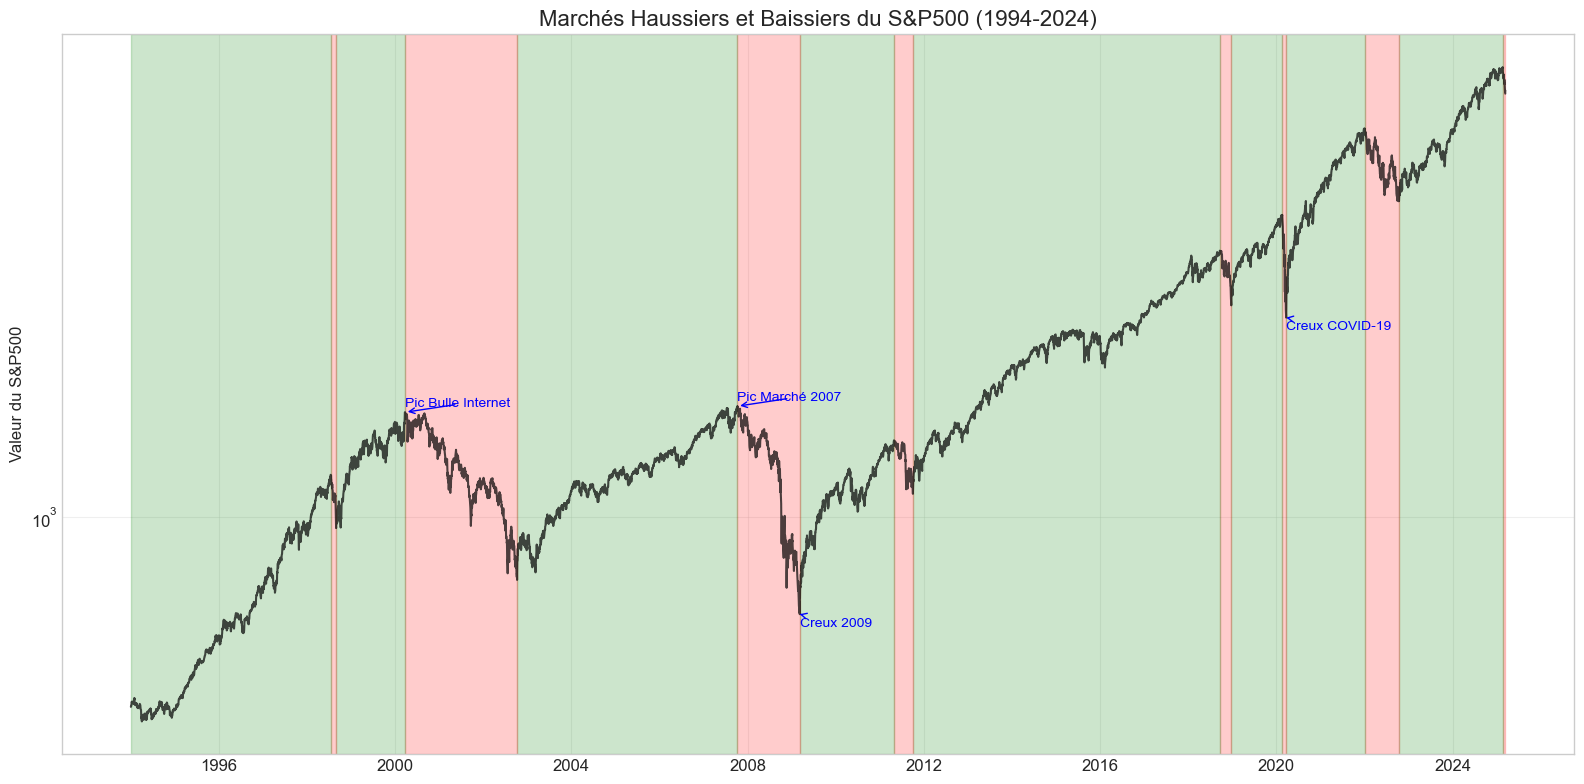

In [65]:
# 12. Identification et analyse des marchés haussiers et baissiers
def identify_bull_bear_markets_direct(prices, threshold=20):
    """
    Identifie directement les marchés haussiers et baissiers:
    - Un marché baissier est une baisse de threshold% ou plus depuis le sommet
    - Un marché haussier est une hausse de threshold% ou plus depuis le creux

    La méthode identifie d'abord tous les sommets et creux importants,
    puis catégorise les périodes entre eux.

    Paramètres:
    - prices: Série de prix (pandas Series)
    - threshold: Seuil en pourcentage (défaut: 20)

    Retourne:
    - DataFrame avec les périodes haussières et baissières
    """
    # Convertir le seuil en décimal
    threshold_decimal = threshold / 100

    # Trouver les sommets et creux significatifs
    peaks_and_troughs = []
    price_max = prices.iloc[0]
    price_min = prices.iloc[0]

    current_state = "searching"  # États possibles: "searching", "potential_bear", "potential_bull"

    for date, price in prices.items():
        if current_state == "searching":
            if price > price_max:
                price_max = price
                max_date = date
            elif price < price_min:
                price_min = price
                min_date = date

            # Vérifier si nous avons une baisse suffisante pour un marché baissier
            if price / price_max - 1 <= -threshold_decimal:
                peaks_and_troughs.append(("peak", max_date, price_max))
                # Réinitialiser et commencer à chercher le creux
                current_state = "potential_bear"
                price_min = price
                min_date = date

            # Vérifier si nous avons une hausse suffisante pour un marché haussier
            elif price / price_min - 1 >= threshold_decimal:
                peaks_and_troughs.append(("trough", min_date, price_min))
                # Réinitialiser et commencer à chercher le sommet
                current_state = "potential_bull"
                price_max = price
                max_date = date

        elif current_state == "potential_bear":
            # Chercher le creux pendant un marché baissier
            if price < price_min:
                price_min = price
                min_date = date

            # Vérifier si nous avons une hausse suffisante pour un marché haussier
            if price / price_min - 1 >= threshold_decimal:
                peaks_and_troughs.append(("trough", min_date, price_min))
                # Réinitialiser et commencer à chercher le sommet
                current_state = "potential_bull"
                price_max = price
                max_date = date

        elif current_state == "potential_bull":
            # Chercher le sommet pendant un marché haussier
            if price > price_max:
                price_max = price
                max_date = date

            # Vérifier si nous avons une baisse suffisante pour un marché baissier
            if price / price_max - 1 <= -threshold_decimal:
                peaks_and_troughs.append(("peak", max_date, price_max))
                # Réinitialiser et commencer à chercher le creux
                current_state = "potential_bear"
                price_min = price
                min_date = date

    # Si nous n'avons pas de points, retourner un DataFrame vide
    if len(peaks_and_troughs) == 0:
        return pd.DataFrame(columns=['Regime', 'Start_Date', 'End_Date', 'Duration_Days',
                                     'Start_Price', 'End_Price', 'Return_Pct'])

    # Créer les périodes à partir des sommets et creux
    regimes = []

    # Si nous commençons par un pic, la période avant était haussière
    # Si nous commençons par un creux, la période avant était baissière
    if peaks_and_troughs[0][0] == "peak":
        # La période du début jusqu'au premier pic était haussière
        regime_start_date = prices.index[0]
        regime_start_price = prices.iloc[0]
        regime_end_date = peaks_and_troughs[0][1]
        regime_end_price = peaks_and_troughs[0][2]

        regimes.append({
            'Regime': 'Baissier',  # Changez 'Haussier' en 'Baissier' pour être cohérent
            'Start_Date': regime_start_date,
            'End_Date': regime_end_date,
            'Duration_Days': (regime_end_date - regime_start_date).days,
            'Start_Price': regime_start_price,
            'End_Price': regime_end_price,
            'Return_Pct': (regime_end_price / regime_start_price - 1) * 100
        })

    # Construire le reste des régimes
    for i in range(len(peaks_and_troughs) - 1):
        point_type, start_date, start_price = peaks_and_troughs[i]
        next_type, end_date, end_price = peaks_and_troughs[i + 1]

        # Si le point actuel est un pic, le prochain régime est baissier
        # Si le point actuel est un creux, le prochain régime est haussier
        regime = 'Haussier' if point_type == 'peak' else 'Baissier'

        regimes.append({
            'Regime': regime,
            'Start_Date': start_date,
            'End_Date': end_date,
            'Duration_Days': (end_date - start_date).days,
            'Start_Price': start_price,
            'End_Price': end_price,
            'Return_Pct': (end_price / start_price - 1) * 100
        })

    # Ajouter la dernière période jusqu'à aujourd'hui
    last_point_type, last_date, last_price = peaks_and_troughs[-1]
    last_regime = 'Baissier' if last_point_type == 'trough' else 'Haussier'

    regimes.append({
        'Regime': last_regime,
        'Start_Date': last_date,
        'End_Date': prices.index[-1],
        'Duration_Days': (prices.index[-1] - last_date).days,
        'Start_Price': last_price,
        'End_Price': prices.iloc[-1],
        'Return_Pct': (prices.iloc[-1] / last_price - 1) * 100
    })

    return pd.DataFrame(regimes)

try:
    # Utiliser l'algorithme direct pour identifier les marchés haussiers et baissiers
    market_regimes = identify_bull_bear_markets_direct(sp500_data[price_column])

    # Séparation des marchés haussiers et baissiers
    bull_markets = market_regimes[market_regimes['Regime'] == 'Haussier']
    bear_markets = market_regimes[market_regimes['Regime'] == 'Baissier']

    # Calcul des statistiques pour les marchés haussiers et baissiers
    bull_stats = {
        'Count': len(bull_markets),
        'Avg_Duration_Days': bull_markets['Duration_Days'].mean() if len(bull_markets) > 0 else 0,
        'Avg_Return_Pct': bull_markets['Return_Pct'].mean() if len(bull_markets) > 0 else 0,
        'Max_Return_Pct': bull_markets['Return_Pct'].max() if len(bull_markets) > 0 else 0,
        'Min_Return_Pct': bull_markets['Return_Pct'].min() if len(bull_markets) > 0 else 0
    }

    bear_stats = {
        'Count': len(bear_markets),
        'Avg_Duration_Days': bear_markets['Duration_Days'].mean() if len(bear_markets) > 0 else 0,
        'Avg_Return_Pct': bear_markets['Return_Pct'].mean() if len(bear_markets) > 0 else 0,
        'Max_Return_Pct': bear_markets['Return_Pct'].max() if len(bear_markets) > 0 else 0,
        'Min_Return_Pct': bear_markets['Return_Pct'].min() if len(bear_markets) > 0 else 0
    }

    # Affichage des résultats
    print("\nAnalyse des marchés haussiers et baissiers (1994-2024):")
    print("\nMarchés haussiers:")
    print(bull_markets)
    print("\nMarchés baissiers:")
    print(bear_markets)

    print("\nStatistiques des marchés haussiers:")
    for stat, value in bull_stats.items():
        print(f"{stat}: {value:.2f}" if isinstance(value, float) else f"{stat}: {value}")

    print("\nStatistiques des marchés baissiers:")
    for stat, value in bear_stats.items():
        print(f"{stat}: {value:.2f}" if isinstance(value, float) else f"{stat}: {value}")

    # Visualisation des marchés haussiers et baissiers
    plt.figure(figsize=(16, 8))
    plt.plot(sp500_data.index, sp500_data[price_column], color='black', alpha=0.7)

    # Mise en évidence des marchés haussiers et baissiers
    for _, regime in market_regimes.iterrows():
        start = regime['Start_Date']
        end = regime['End_Date']
        color = 'green' if regime['Regime'] == 'Haussier' else 'red'
        plt.axvspan(start, end, alpha=0.2, color=color)

    plt.title('Marchés Haussiers et Baissiers du S&P500 (1994-2024)', fontsize=16)
    plt.ylabel('Valeur du S&P500', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.yscale('log')  # Échelle logarithmique pour mieux visualiser les variations en pourcentage

    # Ajout d'annotations pour les événements majeurs si les données couvrent ces périodes
    events = [
        {'date': '2000-03-24', 'name': 'Pic Bulle Internet', 'y_offset': 0.02},
        {'date': '2007-10-09', 'name': 'Pic Marché 2007', 'y_offset': 0.02},
        {'date': '2009-03-09', 'name': 'Creux 2009', 'y_offset': -0.05},
        {'date': '2020-03-23', 'name': 'Creux COVID-19', 'y_offset': -0.05}
    ]

    for event in events:
        event_date = pd.Timestamp(event['date'])
        if event_date >= sp500_data.index.min() and event_date <= sp500_data.index.max():
            try:
                # Trouver la date la plus proche dans l'index
                closest_date = sp500_data.index[sp500_data.index.get_indexer([event_date], method='nearest')[0]]
                price = sp500_data.loc[closest_date, price_column]
                plt.annotate(event['name'], xy=(event_date, price),
                            xytext=(event_date, price * (1 + event['y_offset'])),
                            arrowprops=dict(arrowstyle='->', color='blue'),
                            fontsize=10, color='blue')
            except Exception as e:
                print(f"Impossible d'ajouter l'annotation pour {event['name']}: {str(e)}")

    plt.tight_layout()
    plt.savefig('SP500_Bull_Bear_Markets.png', dpi=300, bbox_inches='tight')
    plt.show()
except Exception as e:
    print(f"Erreur lors de l'analyse des marchés haussiers et baissiers: {str(e)}")